In [13]:
# Import the following libraries to get started

import pandas as pd
import numpy as np
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Tell pandas to display all columns (instead of hiding them in '...')
pd.set_option('display.max_columns', None)

# Data Exploration for Restaurant Data

## Problem Background

I don't know what these datasets are for, what can they tell me and what I can do with it. Hence, let's use some exploratory data analysis to figure out what we can do with these treasure trove of data.

## What's The Data Set About?

Firstly, let's take a look at what are the files available and their data attributes. We would want to consider the following:

1. What are the data attributes
2. What are their data types (this would be useful for us to determine whether it's categorical or numerical. If numerical, is it continuous or ordinal?)

Answering the above questions would allow us to **guess** the relationship between them. After using some intuition to guess, we can then use data exploratory data analysis techniques to further explore their relationship with each other. These information could allow us to create more accurate predictive models later on

## Available Files


In [51]:
import os
files = os.listdir('./data')
for num, file in enumerate(files):
    print(str(num+1) + ": " + file)

1: chefmozparking.csv
2: chefmozaccepts.csv
3: userpayment.csv
4: geoplaces2.csv
5: rating_final.csv
6: usercuisine.csv
7: chefmozcuisine.csv
8: chefmozhours4.csv
9: userprofile.csv


From the above, we can see that we have 9 files in the data directory. 
Let's take a look at what each one of them contains and what could they possibly tell us

### chefmozparking.csv - Restaurants And The Parking They Have

In [52]:
chefmozparking_df = pd.read_csv('./data/chefmozparking.csv')
print(chefmozparking_df.dtypes)
chefmozparking_df.head()
print("\n")

chefmozparking_df.head()

placeID         int64
parking_lot    object
dtype: object




,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [61]:
chefmozparking_df.count()

placeID        702
parking_lot    702
dtype: int64

We can see from the above that we have 702 rows of data

In [63]:
chefmozparking_df.shape

(702, 2)

Another way to check how many rows there are is to use the `shape` **attribute**. We can see that `chefmozparking_df` has **702 rows** and **2 columns/attributes**.

From the above, we can can see that there are only 2 variables:
1. placeID (Integer)
2. parking_lot (Object)

**parking_lot** seems like a String variable to me however. Let's see what other possible values does it have.

In [53]:
print(pd.unique(chefmozparking_df.parking_lot))

['public' 'none' 'yes' 'valet parking' 'fee' 'street' 'validated parking']


We can see from the above that all the possible values of the variable **parking_lot** are Strings. We can make a smart guess on what they could mean:

- **public** refers to **public parking**
- **none** refers to **no parking available**
- **yes** refers to **there is parking available!**
- **valet parking** refers to **there are valets to park for you**
- **fee** refers to **there is a fee-based carpark**
- **street** refers to **parking is avaialable on the street**
- **validated parking** -- not quite sure what this means!

### chefmozaccepts.csv - Restaurants & The Payment Types They Accept

In [54]:
chefmozaccepts_df = pd.read_csv('./data/chefmozaccepts.csv')
print(chefmozaccepts_df.dtypes)
chefmozaccepts_df.head()
print("\n")

print(str(len(pd.unique(chefmozaccepts_df.Rpayment))) + " types of payment options:\n")
print(pd.unique(chefmozaccepts_df.Rpayment))

chefmozaccepts_df.head()

placeID      int64
Rpayment    object
dtype: object


12 types of payment options:

['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


From the above, we can see that there are **many payment types** for each **placeID**. It is represented by having **multiple rows** of the **same placeID** and the **Rpayment** variable. That variable, by smart guessing and some DataFrames magic tells us that there are 12 types of payment options...

### userpayment.csv - Users & Their Modes of Payments

In [55]:
userpayment_df = pd.read_csv('./data/userpayment.csv')
print(userpayment_df.dtypes)
userpayment_df.head()
print("\n")

userpayment_df.head()

userID      object
Upayment    object
dtype: object




,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [56]:
pd.unique(userpayment_df.userID)

array(['U1001', 'U1002', 'U1003', 'U1004', 'U1005', 'U1006', 'U1007',
       'U1008', 'U1009', 'U1010', 'U1011', 'U1012', 'U1013', 'U1014',
       'U1015', 'U1016', 'U1017', 'U1018', 'U1019', 'U1020', 'U1021',
       'U1022', 'U1023', 'U1026', 'U1027', 'U1028', 'U1029', 'U1030',
       'U1031', 'U1032', 'U1033', 'U1034', 'U1035', 'U1036', 'U1037',
       'U1038', 'U1039', 'U1040', 'U1041', 'U1042', 'U1043', 'U1044',
       'U1045', 'U1046', 'U1047', 'U1048', 'U1049', 'U1050', 'U1051',
       'U1052', 'U1053', 'U1054', 'U1055', 'U1056', 'U1057', 'U1058',
       'U1059', 'U1060', 'U1061', 'U1062', 'U1063', 'U1064', 'U1065',
       'U1066', 'U1067', 'U1068', 'U1069', 'U1070', 'U1071', 'U1072',
       'U1073', 'U1074', 'U1075', 'U1076', 'U1077', 'U1078', 'U1079',
       'U1080', 'U1081', 'U1082', 'U1083', 'U1084', 'U1085', 'U1086',
       'U1087', 'U1089', 'U1090', 'U1091', 'U1092', 'U1093', 'U1094',
       'U1095', 'U1096', 'U1097', 'U1098', 'U1099', 'U1100', 'U1101',
       'U1102', 'U11

**Some tiny technical details:** As you can see, all the possible userID values are "UXXXX" where XXXX are integers. Because of the U, it is classified as an Object (possibly a String Object)

From the above, we can see that **userpayment.csv** is about users and their modes of payment. From userID U1004, we can see that the user has **2 types of payments:** cash and bank_debit_cards

In [57]:
groupedPayments = userpayment_df.groupby('userID')
userpayment_df = groupedPayments.aggregate(lambda x: list(x))
print(userpayment_df.dtypes)
userpayment_df.head()

Upayment    object
dtype: object


,Upayment
userID,
U1001,[cash]
U1002,[cash]
U1003,[cash]
U1004,"[cash, bank_debit_cards]"
U1005,[cash]


### geoplaces2.csv - List of restaurants

In [59]:
geoplaces_df = pd.read_csv('./data/geoplaces2.csv')
print(geoplaces_df.dtypes)
geoplaces_df.head()
print("\n")

geoplaces_df.head()

placeID             int64
latitude          float64
longitude         float64
the_geom_meter     object
name               object
address            object
city               object
state              object
country            object
fax                object
zip                object
alcohol            object
smoking_area       object
dress_code         object
accessibility      object
price              object
url                object
Rambience          object
franchise          object
area               object
other_services     object
dtype: object




,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [91]:
geoplaces_df[0:1]

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,?,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none


In [74]:
pd.unique(geoplaces_df.zip)

array(['?', '78280', '78000', '74000', '87018', '78421', '78399', '78250',
       '78395', '78290', '62250', '78269', '62320', '78000S', '62460',
       '78430', '78390', '78200', '62170', '78270', '62790', '78038',
       '78210', '78310', '78740', '62290', '78240', '78396', '78349',
       '78433', '79300', '78214', '64000', '62000', '78220'], dtype=object)

So this is why what should have been int64 attributes are objects. We might want to clean/remove rows with ? in the zip and fax columns. Or maybe not, since the other columns may provide some value...

In [65]:
geoplaces_df.shape

(130, 21)

There are **130 rows** with **21 attributes** for geoplaces_df

### rating_final.csv - List of User Ratings for Restaurants

In [75]:
ratingfinal_df = pd.read_csv('./data/rating_final.csv')
print(ratingfinal_df.dtypes)
ratingfinal_df.head()
print("\n")

ratingfinal_df.head()

userID            object
placeID            int64
rating             int64
food_rating        int64
service_rating     int64
dtype: object




,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [76]:
ratingfinal_df.shape

(1161, 5)

There are **1161 user ratings** with **5 attributes** in total.

### usercuisine.csv - Possibly Cuisine Preference For Each User

In [77]:
usercuisine_df = pd.read_csv('./data/usercuisine.csv')
print(usercuisine_df.dtypes)
usercuisine_df.head()
print("\n")

usercuisine_df.head()

userID      object
Rcuisine    object
dtype: object




,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [78]:
usercuisine_df.shape

(330, 2)

There are **330 records** of user cuisine preferences and **2 attributes** in total

In [82]:
types_of_cuisines = pd.unique(usercuisine_df.Rcuisine)
types_of_cuisines

array(['American', 'Mexican', 'Bakery', 'Breakfast-Brunch', 'Japanese',
       'Contemporary', 'Bagels', 'Cafe-Coffee_Shop',
       'Continental-European', 'Cafeteria', 'Family', 'Juice', 'Hawaiian',
       'Hot_Dogs', 'Latin_American', 'Korean', 'Italian', 'Diner',
       'Fast_Food', 'Deli-Sandwiches', 'Regional', 'Fusion', 'Portuguese',
       'Indian-Pakistani', 'Eastern_European', 'Lebanese', 'Moroccan',
       'Barbecue', 'Polynesian', 'Polish', 'Chinese', 'Pizzeria',
       'Burgers', 'Afghan', 'Middle_Eastern', 'Mongolian', 'Bar', 'Cuban',
       'Tex-Mex', 'Spanish', 'Soup', 'Sushi', 'Game', 'Doughnuts',
       'Australian', 'Asian', 'Dessert-Ice_Cream', 'Seafood', 'Turkish',
       'Organic-Healthy', 'Steaks', 'Mediterranean', 'British', 'Austrian',
       'Israeli', 'Russian-Ukrainian', 'Malaysian', 'Vegetarian',
       'Peruvian', 'Tapas', 'Eclectic', 'African', 'Basque', 'Canadian',
       'Irish', 'Southwestern', 'Tea_House', 'International',
       'Pacific_Northwest', '

In [85]:
len(types_of_cuisines)

103

**103 cuisines!** That's quite a number of cuisine choices!

### chefmozcuisine.csv  - 

In [86]:
chefmozcuisine_df = pd.read_csv('./data/chefmozcuisine.csv')
print(chefmozcuisine_df.dtypes)
chefmozcuisine_df.head()
print("\n")

chefmozcuisine_df.head()

placeID      int64
Rcuisine    object
dtype: object




,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [87]:
chefmozcuisine_df.shape

(916, 2)

There are **916 records** for the types of cuisines the various restaurants serves. There are **2 attributes in total**. They are: placeID and Rcuisine

### chefmozhours4.csv - 

In [88]:
chefmozhours_df = pd.read_csv('./data/chefmozhours4.csv')
print(chefmozhours_df.dtypes)
chefmozhours_df.head()
print("\n")

chefmozhours_df.head()

placeID     int64
hours      object
days       object
dtype: object




,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [89]:
chefmozhours_df.shape

(2339, 3)

There are **2339 records** of a restaurants operational hours. Note that **a placeID** can have **multiple records** because different days could have different operational hours!

### userprofile.csv - User profiles with 18 personal data attributes

In [14]:
userprofile_df = pd.read_csv('./data/userprofile.csv')
print(userprofile_df.dtypes)
userprofile_df.head()
print("\n")

userprofile_df.head()

userID               object
latitude            float64
longitude           float64
smoker               object
drink_level          object
dress_preference     object
ambience             object
transport            object
marital_status       object
hijos                object
birth_year            int64
interest             object
personality          object
religion             object
activity             object
color                object
weight                int64
budget               object
height              float64
dtype: object




,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [17]:
userprofile_df.shape

(138, 19)

In [18]:
# To confirm that there are no duplicate users here!
len(pd.unique(userprofile_df.userID))

138

There are **138 users**, each with **19 attributes**

## Let's Dive In Deeper

We are done with exploring what the data has to offer us. Now let's see if we can reveal what are their relationships with each other!

Some possible, funny questions we could try to answer:
1. Do people with higher BMI (fatter) tend to rate restaurants higher or lower? 

   - Higher or lower could imply that they are more particular about their food or... 
   - That they are less concerned about quality and they are simply gluttonous)
   
   
To calculate the BMI score, I have attached the formula in LaTEX below:

In [19]:
%%latex
\begin{align}
BMI = \frac{weight\ in\ kg}{height\ in\ m^2}
\end{align}

<IPython.core.display.Latex object>

In [28]:
userprofile_df["bmi"] = userprofile_df.weight / userprofile_df.height**2
userprofile_df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,bmi
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,22.024323
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,11.438703
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,21.007668
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,18.796189
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69,22.758307


In [38]:
conditions = [
    userprofile_df["bmi"] < 18.5,
    (userprofile_df["bmi"] >= 18.5) & (userprofile_df["bmi"] <= 24.9),
    (userprofile_df["bmi"] >= 25) & (userprofile_df["bmi"] <= 29.9),
    (userprofile_df["bmi"] >= 30) & (userprofile_df["bmi"] < 34.9),
    userprofile_df["bmi"] >= 35,
]
choices = ['underweight', 'normal', 'overweight', 'obese', 'extremely obese']

In [44]:
def set_bmi_english(row):
    if row["bmi"] < 18.5:
        return "underweight"
    elif (row["bmi"] >= 18.5) & (row["bmi"] <= 24.9):
        return "normal"
    elif (row["bmi"] >= 25) & (row["bmi"] <= 29.9):
        return "overweight"
    elif (row["bmi"] >= 30) & (row["bmi"] < 34.9):
        return "obese"
    elif (row["bmi"] >= 35):
        return "extremely obese"
userprofile_df = userprofile_df.assign(bmi_english=userprofile_df.apply(set_bmi_english, axis=1))
userprofile_df

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,bmi,bmi_english
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,22.024323,normal
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,11.438703,underweight
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,21.007668,normal
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,18.796189,normal
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69,22.758307,normal
5,U1006,22.150000,-100.983000,true,social drinker,no preference,friends,car owner,single,independent,1989,variety,hard-worker,none,student,blue,75,medium,1.80,23.148148,normal
6,U1007,22.118464,-100.938256,false,casual drinker,informal,solitary,public,single,independent,1989,variety,thrifty-protector,Catholic,student,purple,60,low,1.59,23.733238,normal
7,U1008,22.122989,-100.923811,false,social drinker,formal,solitary,public,single,independent,1989,technology,hard-worker,Catholic,student,green,68,low,1.72,22.985398,normal
8,U1009,22.159427,-100.990448,false,abstemious,formal,family,on foot,single,kids,1991,variety,thrifty-protector,Catholic,student,green,75,medium,1.78,23.671254,normal
9,U1010,22.190889,-100.998669,false,social drinker,no preference,friends,car owner,married,kids,1987,technology,hard-worker,none,student,green,40,medium,1.67,14.342572,underweight


In [74]:
columns = list(userprofile_df)
columns = [i for i in columns if i not in (
    'bmi_english',
    'userID')]
columns

['latitude',
 'longitude',
 'smoker',
 'drink_level',
 'dress_preference',
 'ambience',
 'transport',
 'marital_status',
 'hijos',
 'birth_year',
 'interest',
 'personality',
 'religion',
 'activity',
 'color',
 'weight',
 'budget',
 'height',
 'bmi']

In [93]:
agg_groupby = df.groupby('bmi_english', as_index=False).agg({
    'userID': 'count',
}).rename(index=str, columns={
    'userID': 'userCount',})
agg_groupby


,bmi_english,userCount
0,extremely obese,5
1,normal,81
2,obese,6
3,overweight,29
4,underweight,16


In [63]:
len(userprofile_df.bmi_english[userprofile_df.bmi_english == "underweight"])

16

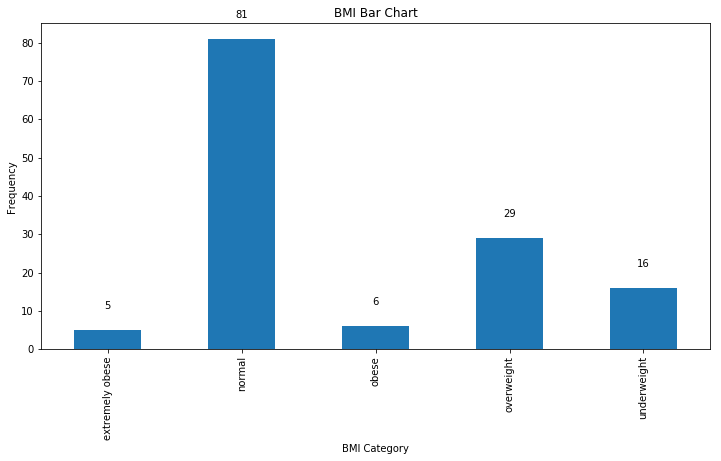

In [102]:

frequencies = agg_groupby.userCount   # bring some raw data

freq_series = pd.Series.from_array(frequencies)   # in my original code I create a series and run on that, so for consistency I create a series from the list.

x_labels = list(agg_groupby.bmi_english)

# now to plot the figure...
plt.figure(figsize=(12, 6))
ax = freq_series.plot(kind='bar')
ax.set_title("BMI Bar Chart")
ax.set_xlabel("BMI Category")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Now make some labels
labels = pd.unique(agg_groupby.userCount)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("image.png")